# Step 2 - Classification of text data using fully connected neural networks

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [ ]:
def show_percentage(m, n):
    clear_output(wait=True)
    k = m / (n - 1)
    percent = int(k * 100)
    print('[' + 'x'*percent + '-'*(100 - percent) + ']' + " {:.2%}".format(k))
    print("{}/{} complete".format(m + 1, n))

### Get the Data
##### Download the processed on Step 1 dataset.

In [ ]:
def str_to_lst(x):
    return x.replace("'", "").replace("[", "").replace("]", "").split(", ")

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/preprocessed_data.csv")
df['job_description'] = df['job_description'].apply(lambda x: str_to_lst(x))
df.head()

,job_no,job_description,job_type,category
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations


### Job Type

##### Convert text data to numeric.
We put the number in accordance with each type. For convenience, write these numbers in a separate column.

In [ ]:
Job_type = {
    'Permanent': 0,
    'Contract/Interim': 1,
    'Contract/Temp': 2,
    'Temporary/Seasonal': 3,
    'Any': 4,
    'Part-Time': 5
}

df['type_label'] = df['job_type'].apply(lambda x: Job_type[x])
df.head()

,job_no,job_description,job_type,category,type_label
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research,0
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing,1
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations,0


### Split the data
##### We divide the data in the ratio of 80/20 into data for training and testing of the model.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df['job_description'], 
    df['type_label'], 
    test_size = 0.20, 
    random_state = 42
)

### Vectorization

In [ ]:
# Collect all the tokens of the corpus in a "dictionary" 
tokens = []
for lst in df["job_description"]:
    tokens += lst
    
dictionary = list(set(tokens))
dictionary.sort()

In [ ]:
def tokens_to_num(lst):
    """Returns the numeric representation of the document words (word index in the dictionary)."""
    res = [dictionary.index(i) for i in lst]
    return res

In [ ]:
n = len(X_train)
for i in range(n):
    lst = X_train.iloc[i]
    X_train.iloc[i] = tokens_to_num(lst)
    show_percentage(i, n)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
14125/14125 complete


In [ ]:
train_copy = pd.DataFrame([X_train.copy()]).T
train_copy["y"] = Y_train.copy()
train_copy.to_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_type_train.csv", index=False)

In [ ]:
n = len(X_test)
for i in range(n):
    lst = X_test.iloc[i]
    X_test.iloc[i] = tokens_to_num(lst)
    show_percentage(i, n)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
3532/3532 complete


In [ ]:
test_copy = pd.DataFrame([X_test.copy()]).T
test_copy["y"] = Y_test.copy()
test_copy.to_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_type_test.csv", index=False)

In [ ]:
def vectorize_sequences(sequences, dimension=20000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(X_train, len(dictionary))
x_test = vectorize_sequences(X_test, len(dictionary))
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

### Train a fully connected neural network

In [ ]:
# create a model of a fully connected neural network with two layers
# at the output we get a vector with the distribution of probabilities of 
# belonging of the described job to one or another type 

model_type = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(6, activation = "softmax")
])

model_type.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

history = model_type.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 256,
    validation_split = 0.2,
    shuffle = True,
    verbose = 2
)

Epoch 1/10
45/45 - 1s - loss: 0.3782 - accuracy: 0.9005 - val_loss: 0.1596 - val_accuracy: 0.9575 - 1s/epoch - 28ms/step
Epoch 2/10
45/45 - 1s - loss: 0.0965 - accuracy: 0.9727 - val_loss: 0.0799 - val_accuracy: 0.9763 - 561ms/epoch - 12ms/step
Epoch 3/10
45/45 - 1s - loss: 0.0473 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9844 - 566ms/epoch - 13ms/step
Epoch 4/10
45/45 - 1s - loss: 0.0298 - accuracy: 0.9931 - val_loss: 0.0424 - val_accuracy: 0.9915 - 554ms/epoch - 12ms/step
Epoch 5/10
45/45 - 1s - loss: 0.0217 - accuracy: 0.9950 - val_loss: 0.0397 - val_accuracy: 0.9883 - 570ms/epoch - 13ms/step
Epoch 6/10
45/45 - 1s - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.0358 - val_accuracy: 0.9897 - 562ms/epoch - 12ms/step
Epoch 7/10
45/45 - 1s - loss: 0.0138 - accuracy: 0.9966 - val_loss: 0.0305 - val_accuracy: 0.9940 - 559ms/epoch - 12ms/step
Epoch 8/10
45/45 - 1s - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.0341 - val_accuracy: 0.9915 - 599ms/epoch - 13ms/step
Epoch 9/10


In [ ]:
model_type.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1036096   
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,036,486
Trainable params: 1,036,486
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def loss_plot(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

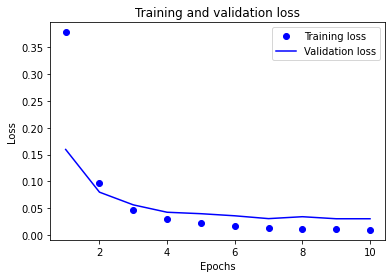

In [ ]:
loss_plot(history)

In [ ]:
score = model_type.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.03889083489775658
Test accuracy: 0.9903737306594849


### Category

In [ ]:
Category = {
    'Pharmaceutical, Healthcare and Medical Sales':0,
    'Clinical Research':1,
    'Pharmaceutical Marketing':2,
    'Manufacturing & Operations':3,
    'Science':4,
    'Medical Affairs / Pharmaceutical Physician':5,
    'Regulatory Affairs':6,
    'Medical Information and Pharmacovigilance':7,
    'Data Management and Statistics':8,
    'Quality-assurance':9,
    'Pharmacy':10
    }

df['category_label'] = df['category'].apply(lambda x: Category[x])
df.head()

,job_no,job_description,job_type,category,category_label
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research,1
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing,2
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations,3


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df['job_description'], 
    df['category_label'], 
    test_size=0.20, 
    random_state=42
)

In [ ]:
for i in range(len(X_train)):
    lst = X_train.iloc[i]
    X_train.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_train))

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
14125/14125 complete


In [ ]:
train_copy = pd.DataFrame([X_train.copy()]).T
train_copy["y"] = Y_train.copy()
train_copy.to_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_category_train.csv", index=False)

In [ ]:
for i in range(len(X_test)):
    lst = X_test.iloc[i]
    X_test.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_test))

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
3532/3532 complete


In [ ]:
test_copy = pd.DataFrame([X_test.copy()]).T
test_copy["y"] = Y_test.copy()
test_copy.to_csv("/content/gdrive/MyDrive/practice_nlp_2022/data/tmp_category_test.csv", index=False)

In [ ]:
x_train = vectorize_sequences(X_train, len(dictionary))
x_test = vectorize_sequences(X_test, len(dictionary))
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

In [ ]:
model_category = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(11, activation = "softmax")
])

model_category.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

history = model_category.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 256,
    validation_split = 0.2,
    shuffle = True,
    verbose = 2
)

Epoch 1/10
45/45 - 1s - loss: 1.5243 - accuracy: 0.4615 - val_loss: 1.1922 - val_accuracy: 0.5423 - 1s/epoch - 25ms/step
Epoch 2/10
45/45 - 1s - loss: 0.9853 - accuracy: 0.6182 - val_loss: 1.0659 - val_accuracy: 0.5664 - 537ms/epoch - 12ms/step
Epoch 3/10
45/45 - 1s - loss: 0.8286 - accuracy: 0.6555 - val_loss: 1.0269 - val_accuracy: 0.5749 - 519ms/epoch - 12ms/step
Epoch 4/10
45/45 - 1s - loss: 0.7494 - accuracy: 0.6857 - val_loss: 1.0178 - val_accuracy: 0.5784 - 544ms/epoch - 12ms/step
Epoch 5/10
45/45 - 1s - loss: 0.7077 - accuracy: 0.6911 - val_loss: 1.0206 - val_accuracy: 0.5773 - 524ms/epoch - 12ms/step
Epoch 6/10
45/45 - 1s - loss: 0.6712 - accuracy: 0.7008 - val_loss: 1.0356 - val_accuracy: 0.5738 - 531ms/epoch - 12ms/step
Epoch 7/10
45/45 - 1s - loss: 0.6524 - accuracy: 0.7038 - val_loss: 1.0620 - val_accuracy: 0.5604 - 519ms/epoch - 12ms/step
Epoch 8/10
45/45 - 1s - loss: 0.6341 - accuracy: 0.7082 - val_loss: 1.0675 - val_accuracy: 0.5731 - 523ms/epoch - 12ms/step
Epoch 9/10


In [ ]:
model_category.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1036096   
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 1,036,811
Trainable params: 1,036,811
Non-trainable params: 0
_________________________________________________________________


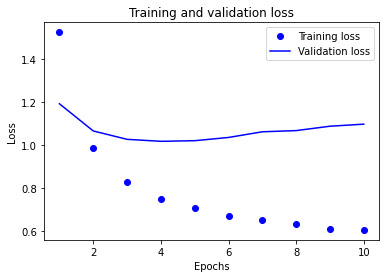

In [ ]:
loss_plot(history)

In [ ]:
score = model_category.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.0669363737106323
Test accuracy: 0.5789920687675476
